In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics.scorer import SCORERS
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC

# model cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold

# model evaluation metrics
from sklearn.metrics.scorer import SCORERS
### classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
### regression metrics
from sklearn.metrics import mean_squared_error

# data preparation for model learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# model building
### single model
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
### ensemble of models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# handling class imbalance
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import CondensedNearestNeighbour as CNN 

# parameter search for model selection
from sklearn.model_selection import GridSearchCV

# data sets
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from mglearn.datasets import make_blobs
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from mglearn.datasets import make_forge
from mglearn.tools import make_handcrafted_dataset
from sklearn.datasets import make_moons
from imblearn.datasets import fetch_datasets

# Scientific computing: e.g., sparse data
import scipy as sp
from scipy import sparse

# other: foundational modules
import numpy as np
import pandas as pd
import random
import math

# visualization
import mglearn
# otherwise, call plt.show() to show figs
%matplotlib inline 
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
from mpl_toolkits.mplot3d import Axes3D, axes3d
# https://matplotlib.org/1.4.3/mpl_toolkits/index.html

# envrionment management: file directory, path
import os
import sys
# Add the system path to the Graphviz

In [2]:
df_dropall = pd.read_csv('../data/drop_all.csv', index_col=0)
df_drop1 = pd.read_csv('../data/drop_ver1.csv', index_col=0)

In [3]:
df_dropall

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,transmission,price_eur
645106,smart,fortwo,99985.0,2004.0,698.0,37.0,auto,2000.22
2468530,ford,focus,212020.0,2002.0,1753.0,66.0,man,1600.00
3478350,volkswagen,golf,180000.0,2003.0,1900.0,74.0,man,1295.34
1135859,fiat,grande-punto,85613.0,2007.0,1248.0,55.0,man,3800.00
2167119,renault,megane,116000.0,2011.0,1461.0,81.0,auto,8950.00
...,...,...,...,...,...,...,...,...
1532272,fiat,doblo,111000.0,2009.0,1900.0,77.0,man,8500.00
2645571,toyota,rav4,238000.0,2001.0,1998.0,110.0,man,3663.95
2631653,skoda,fabia,13254.0,2012.0,1197.0,63.0,man,11450.00
1950514,renault,clio,97000.0,2011.0,1461.0,55.0,man,7500.00


In [4]:
df_dropall = df_dropall.drop(['model'],axis=1)

In [5]:
df_dropall

,maker,mileage,manufacture_year,engine_displacement,engine_power,transmission,price_eur
645106,smart,99985.0,2004.0,698.0,37.0,auto,2000.22
2468530,ford,212020.0,2002.0,1753.0,66.0,man,1600.00
3478350,volkswagen,180000.0,2003.0,1900.0,74.0,man,1295.34
1135859,fiat,85613.0,2007.0,1248.0,55.0,man,3800.00
2167119,renault,116000.0,2011.0,1461.0,81.0,auto,8950.00
...,...,...,...,...,...,...,...
1532272,fiat,111000.0,2009.0,1900.0,77.0,man,8500.00
2645571,toyota,238000.0,2001.0,1998.0,110.0,man,3663.95
2631653,skoda,13254.0,2012.0,1197.0,63.0,man,11450.00
1950514,renault,97000.0,2011.0,1461.0,55.0,man,7500.00


In [6]:
makers = df_dropall.maker.unique()
transmissions = df_dropall.transmission.unique()

In [7]:
le = LabelEncoder()
le.fit(makers)

LabelEncoder()

In [8]:
list(le.classes_)

['alfa-romeo',
 'audi',
 'bmw',
 'chevrolet',
 'chrysler',
 'citroen',
 'dacia',
 'dodge',
 'fiat',
 'ford',
 'honda',
 'hyundai',
 'infinity',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lancia',
 'land-rover',
 'lexus',
 'lotus',
 'mazda',
 'mercedes-benz',
 'mini',
 'mitsubishi',
 'nissan',
 'opel',
 'peugeot',
 'porsche',
 'renault',
 'rover',
 'seat',
 'skoda',
 'smart',
 'subaru',
 'suzuki',
 'toyota',
 'volkswagen',
 'volvo']

In [9]:
df_dropall['maker_label'] = le.transform(df_dropall['maker'])

In [10]:
le = LabelEncoder()
le.fit(transmissions)

LabelEncoder()

In [11]:
list(le.classes_)

['auto', 'man']

In [12]:
df_dropall['transmission_label'] = le.transform(df_dropall['transmission'])

In [13]:
df_final = df_dropall.drop(['maker', 'transmission'], axis=1)

In [14]:
df_final

,mileage,manufacture_year,engine_displacement,engine_power,price_eur,maker_label,transmission_label
645106,99985.0,2004.0,698.0,37.0,2000.22,33,0
2468530,212020.0,2002.0,1753.0,66.0,1600.00,9,1
3478350,180000.0,2003.0,1900.0,74.0,1295.34,37,1
1135859,85613.0,2007.0,1248.0,55.0,3800.00,8,1
2167119,116000.0,2011.0,1461.0,81.0,8950.00,29,0
...,...,...,...,...,...,...,...
1532272,111000.0,2009.0,1900.0,77.0,8500.00,8,1
2645571,238000.0,2001.0,1998.0,110.0,3663.95,36,1
2631653,13254.0,2012.0,1197.0,63.0,11450.00,32,1
1950514,97000.0,2011.0,1461.0,55.0,7500.00,29,1


In [20]:
X = df_final.drop(['price_eur'], axis=1)
y = df_final['price_eur']

In [21]:
X.shape

(327432, 6)

In [22]:
y.shape

(327432,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [43]:
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [45]:
rf = RandomForestRegressor()

In [47]:
param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

In [49]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train_new, y_train_new)

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 43.7min


KeyboardInterrupt: 

In [73]:
print(gs.best_score_)
print(gs.best_params_)

0.7751932880563268
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [74]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_val, y_val))

Score: 0.77


Feature ranking:
1. feature 1 (0.586335)
2. feature 3 (0.175607)
3. feature 0 (0.118108)
4. feature 4 (0.062676)
5. feature 2 (0.053052)
6. feature 5 (0.004221)
['mileage' 'manufacture_year' 'engine_displacement' 'engine_power'
 'maker_label' 'transmission_label']


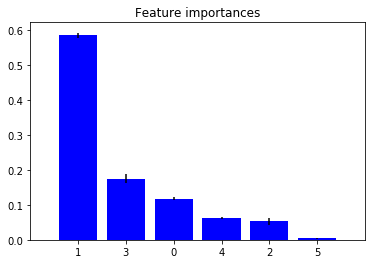

In [83]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print(X_train.columns.values)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
importances = forest.feature_importances_
x = np.arrage(len(y))
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
plt.bar(x, y, align='center')
plt.xticks(x, X_train.columns.values)


K-Fold

In [39]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}


for train_index, val_index in kf.split(X_train): 
    ## data split
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
    gs = gs.fit(X_train_fold, y_train_fold)
    print(gs.best_score_)
    print(gs.best_params_)
    bp = gs.best_params_
    forest = RandomForestRegressor(criterion=bp['criterion'],
                                  min_samples_leaf=bp['min_samples_leaf'],
                                  min_samples_split=bp['min_samples_split'],
                                  max_depth=bp['max_depth'],
                                  n_estimators=bp['n_estimators'])
    forest.fit(X_train, y_train)
    
    y_pred = forest.predict(X_val_fold, y_val_fold)
    
    acc_fold = accuracy_score(y_true=y_val_fold, y_pred=y_pred)
    accuracies.append(acc_fold)

acc_mean = np.mean(accuracies)  # average of each fold
print(f"Mean accuracy: {acc_mean:.1%}")

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   52.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   52.4s finished


0.7755150274158711
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


TypeError: predict() takes 2 positional arguments but 3 were given

,mileage,manufacture_year,engine_displacement,engine_power,maker_label,transmission_label
708174,143560.0,2007.0,1968.0,103.0,31,1
2355930,107700.0,2002.0,973.0,43.0,26,1
2546177,56000.0,2007.0,1995.0,110.0,2,1
2946242,10000.0,2016.0,1197.0,66.0,37,1
262564,100.0,2014.0,1199.0,60.0,5,1
...,...,...,...,...,...,...
2122240,127325.0,2012.0,1968.0,103.0,37,1
2743867,198000.0,2004.0,1997.0,80.0,5,1
1587217,317000.0,2006.0,1968.0,103.0,37,1
1647502,35750.0,2013.0,1390.0,90.0,37,0


In [52]:
df_final['mileage_per_year'] = df_final['mileage']/(2017-df_final['manufacture_year'])

In [97]:
len(df_dropall['maker'].unique())

39

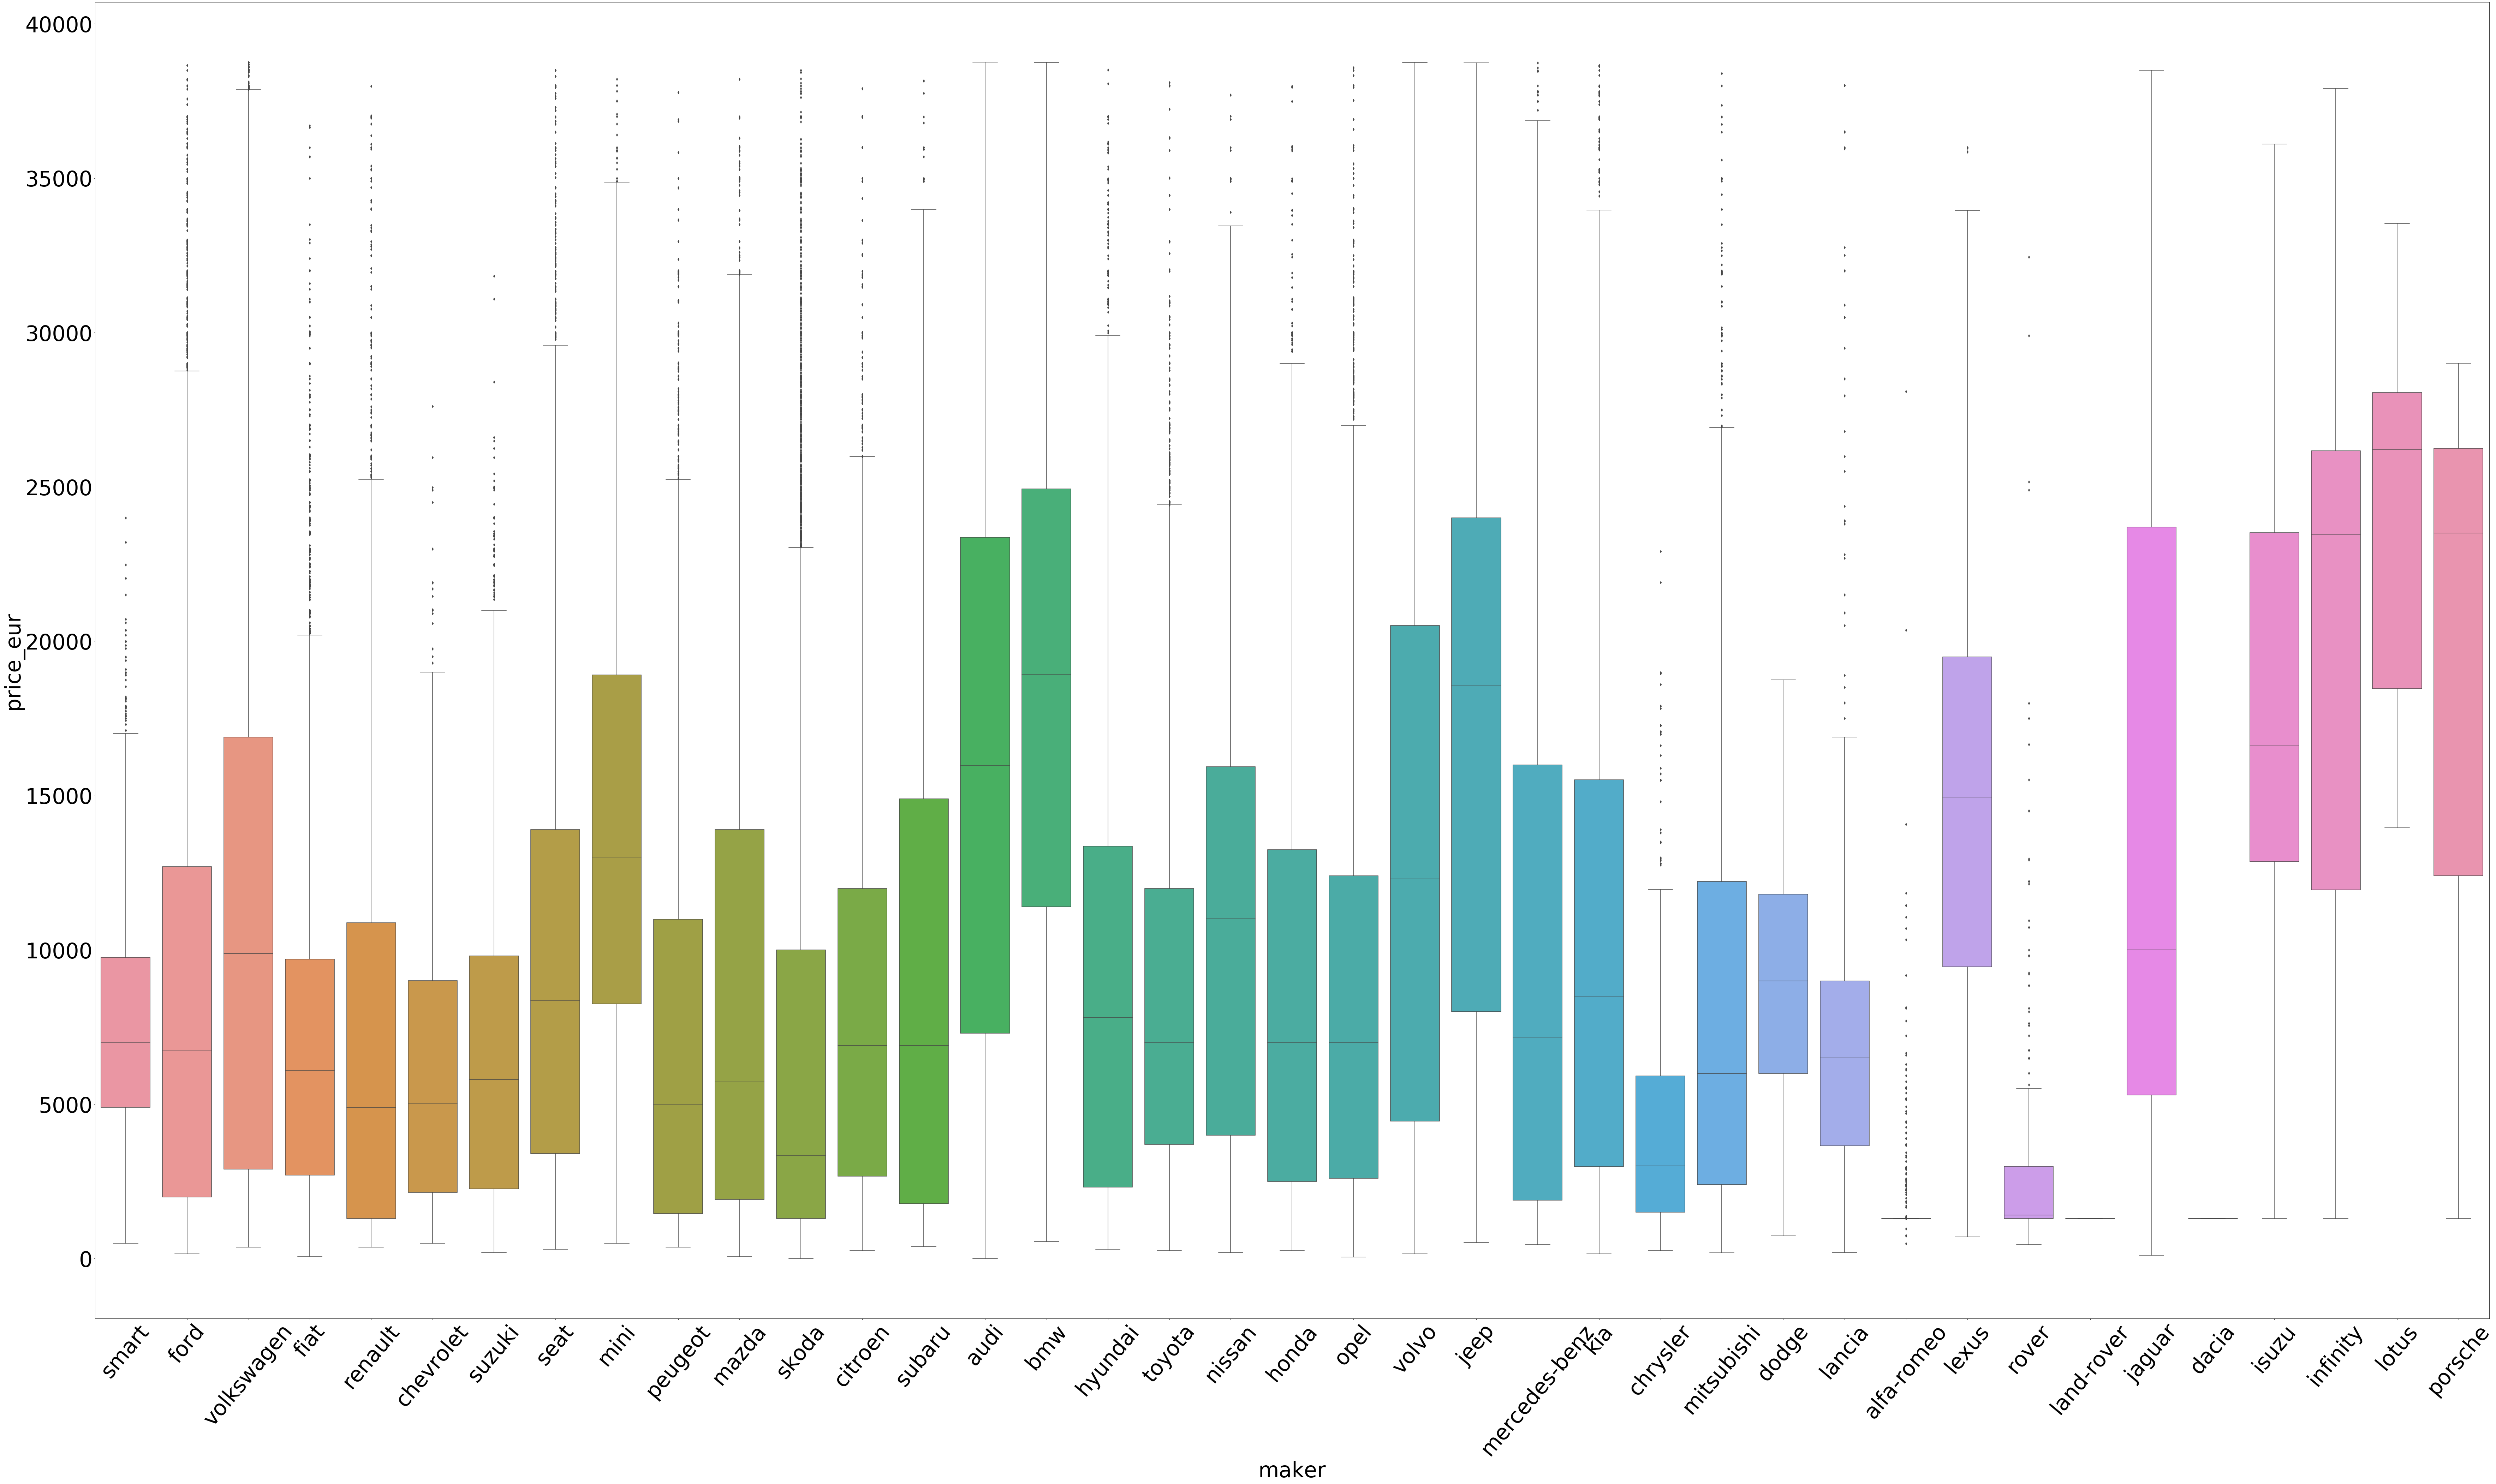

In [64]:
plt.rcParams["font.size"] = 60
plt.rcParams['figure.figsize'] = (100, 60)
sns.boxplot(x='maker', y='price_eur', data=df_dropall)
plt.xticks(rotation=50)
plt.tight_layout()

In [67]:
df_dropall2016 =df_dropall[df_dropall['manufacture_year']==2016]

,maker,mileage,manufacture_year,engine_displacement,engine_power,transmission,price_eur,maker_label,transmission_label
2355598,volkswagen,4870.0,2016.0,1395.0,92.0,auto,20935.86,37,0
2611842,peugeot,5.0,2016.0,1199.0,98.0,man,24490.00,27,1
3162747,skoda,18405.0,2016.0,1968.0,140.0,man,1295.34,32,1
2004607,seat,10.0,2016.0,1956.0,110.0,man,26889.97,31,1
3337160,hyundai,21182.0,2016.0,1995.0,100.0,man,1295.34,11,1
...,...,...,...,...,...,...,...,...,...
1615852,opel,20.0,2016.0,1598.0,100.0,man,19569.10,26,1
1579087,suzuki,10.0,2016.0,1586.0,88.0,man,19289.00,35,1
2674071,fiat,10.0,2016.0,1400.0,103.0,auto,23900.00,8,0
2809903,peugeot,4900.0,2016.0,1560.0,73.0,auto,21990.82,27,0


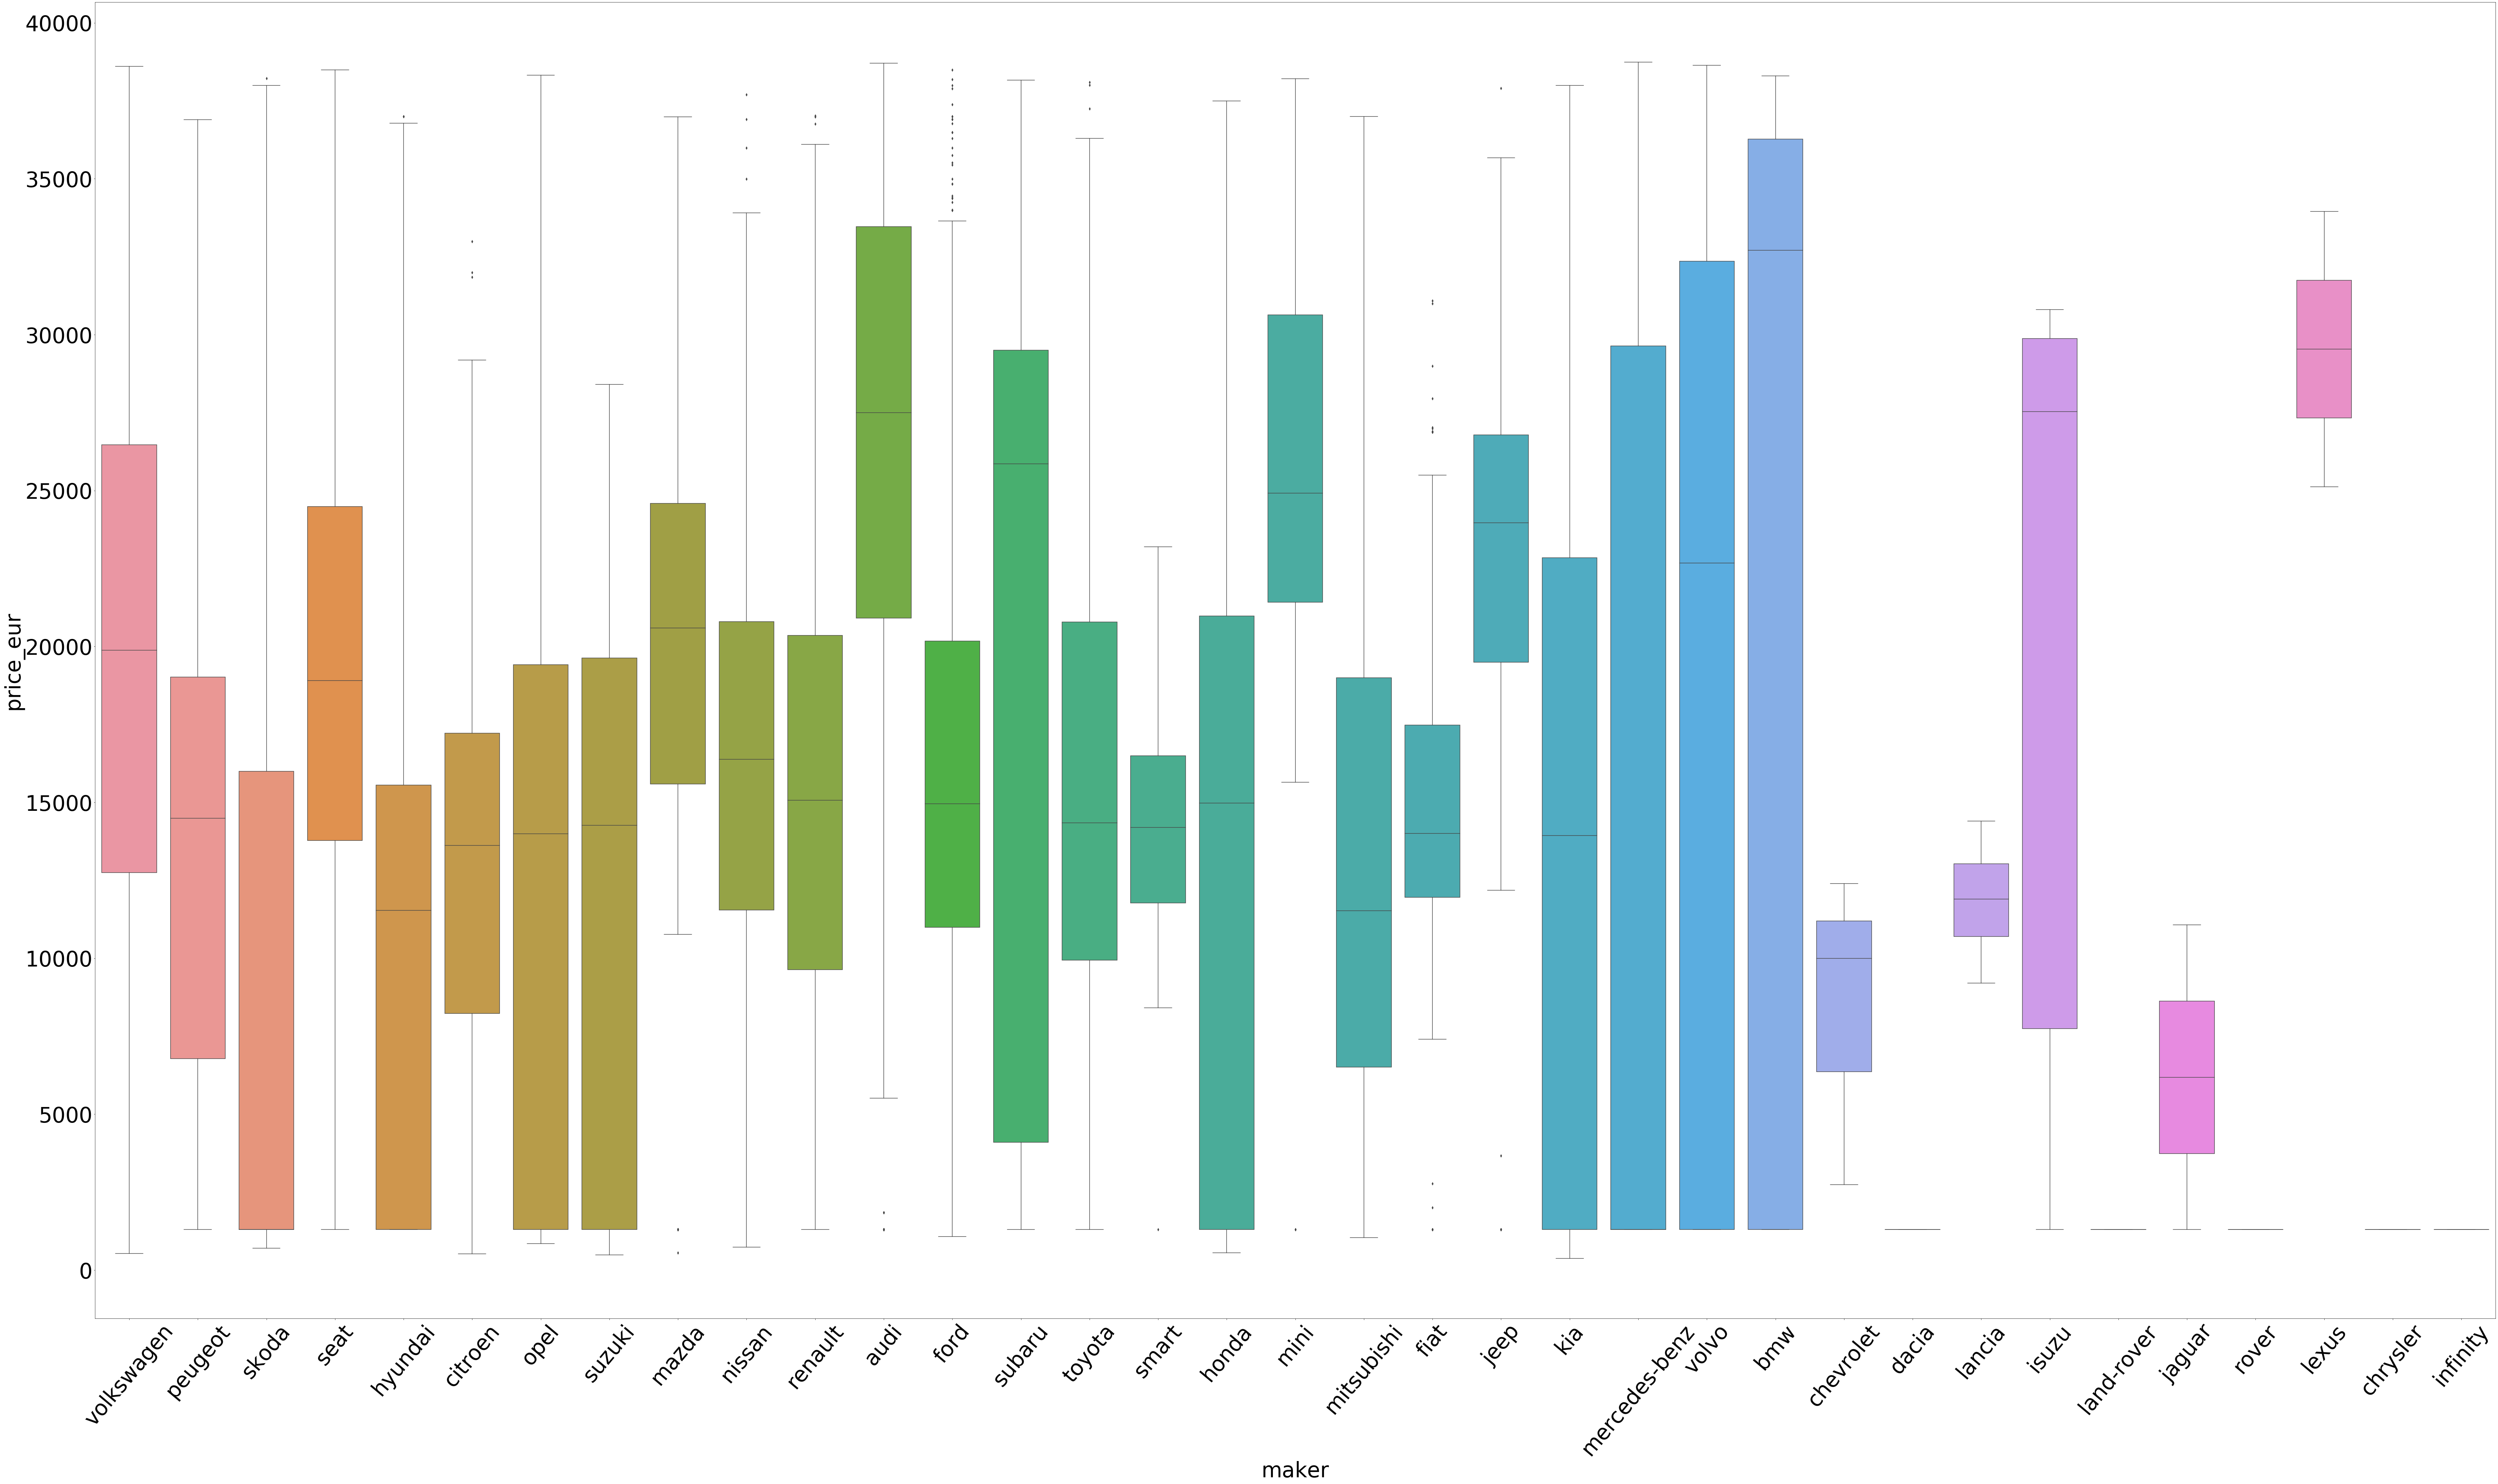

In [68]:
sns.boxplot(x='maker', y='price_eur', data=df_dropall2016)
plt.xticks(rotation=50)
plt.tight_layout()

In [70]:
makergroup = df_dropall.groupby(by='maker')

In [81]:
makergroup = makergroup.mean().sort_values('price_eur')

In [91]:
makergroup = pd.DataFrame(makergroup)

In [103]:
label = list(range(1000, 25000, 1000))

makergroup['maker_label'] = pd.cut(makergroup['price_eur'], bins=24, labels=label)

In [121]:
maker_dic = makergroup['maker_label'].to_dict()

In [122]:
makerlist = df_dropall['maker'].to_list()

In [124]:
makerlabel = []
for maker in makerlist:
    makerlabel.append(maker_dic[maker])

In [126]:
df_final['maker_label'] = makerlabel

In [127]:
df_final

,mileage,manufacture_year,engine_displacement,engine_power,price_eur,maker_label,transmission_label,mileage_per_year
645106,99985.0,2004.0,698.0,37.0,2000.22,7000,0,7691.153846
2468530,212020.0,2002.0,1753.0,66.0,1600.00,8000,1,14134.666667
3478350,180000.0,2003.0,1900.0,74.0,1295.34,11000,1,12857.142857
1135859,85613.0,2007.0,1248.0,55.0,3800.00,7000,1,8561.300000
2167119,116000.0,2011.0,1461.0,81.0,8950.00,6000,0,19333.333333
...,...,...,...,...,...,...,...,...
1532272,111000.0,2009.0,1900.0,77.0,8500.00,7000,1,13875.000000
2645571,238000.0,2001.0,1998.0,110.0,3663.95,8000,1,14875.000000
2631653,13254.0,2012.0,1197.0,63.0,11450.00,6000,1,2650.800000
1950514,97000.0,2011.0,1461.0,55.0,7500.00,6000,1,16166.666667
